In [1]:
from make_dataset import *

In [2]:
import classyRF

In [17]:
import importlib
importlib.reload(make_dataset)
#importlib.reload(classyRF)

NameError: name 'make_dataset' is not defined

In [3]:
createJointDataset()

37874 massgap events after FAR cut
Adding  26512  samples in the mass gap to training
Adding  11362  samples in the mass gap to testing
----Training dataset----
Two categories:  0 - No Mass Gap, 1 - Mass Gap
{0: 138337, 1: 28174}
Three categories: 0 - a mass<3,  1 - Mass Gap,  2 - a mass>5
{0: 22246, 1: 28174, 2: 116091}
Four categories: 0 - m1&m2<3 (BNS),  1 - Mass Gap,  2 - m1>5 & m2<3 (NSBH) ,  3 - m1&m2>5 (BBH)
{0: 22246, 1: 28174, 2: 75226, 3: 40865}
----Testing dataset----
Two categories:  0 - No Mass Gap, 1 - Mass Gap
{0: 59289, 1: 12072}
Three categories: 0 - a mass<3,  1 - Mass Gap,  2 - a mass>5
{0: 9453, 1: 12072, 2: 49836}
Four categories: 0 - m1&m2<3 (BNS),  1 - Mass Gap,  2 - m1>5 & m2<3 (NSBH) ,  3 - m1&m2>5 (BBH)
{0: 9453, 1: 12072, 2: 32257, 3: 17579}


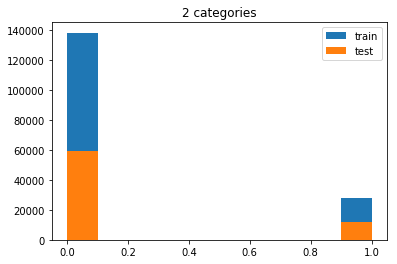

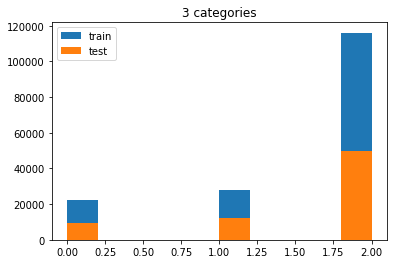

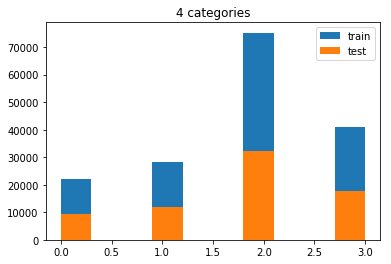

In [4]:
plt.title("2 categories")
plt.hist(readfile(pathHere+'train_2cat.csv')[:,-1], label='train')
plt.hist(readfile(pathHere+'test_2cat.csv')[:,-1], label='test')
plt.legend()
plt.show()

plt.title("3 categories")
plt.hist(readfile(pathHere+'train_3cat.csv')[:,-1], label='train')
plt.hist(readfile(pathHere+'test_3cat.csv')[:,-1], label='test')
plt.legend()
plt.show()


plt.title("4 categories")
plt.hist(readfile(pathHere+'train_4cat.csv')[:,-1], label='train')
plt.hist(readfile(pathHere+'test_4cat.csv')[:,-1], label='test')
plt.legend()
plt.show()


All approaches are unbalanced

## Other types of score
As the events in different categories are not balanced, the score can be misleading. We therefore use other metrics:

**Sensitivity**: tp/(tp+fn). Measures how much the model says YES when it is YES, even if we say YES to some events that are NO.

**Precision**: tp/(tp+fp). How much we can trust the model when it says YES. Never say YES when it is NO.

**F1 score**: a combination of the previous two, which balance them. The best case scenario is value = 1.

These will be taken with threshold=0.5 (they will be used as first check to see if the method worths more time)

# 2 categories

50 trees, max_depth=15
Score on testing:  0.9508414960552682
******Confusion matrix******


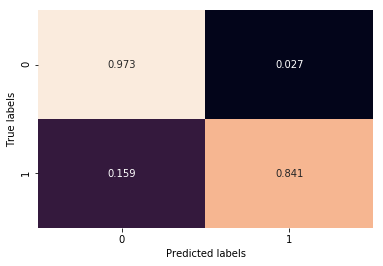

Sensitivity  0.8407057654075547
Precision  0.8649224475882051
F1 score  0.8526421910442746
---------------------------
50 trees, max_depth=None
Score on testing:  0.9522147951962556
******Confusion matrix******


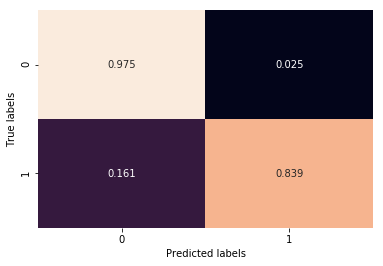

Sensitivity  0.8385520212060968
Precision  0.8738777624309393
F1 score  0.8558505241799121
---------------------------
100 trees, max_depth=15
Score on testing:  0.9507714297725648
******Confusion matrix******


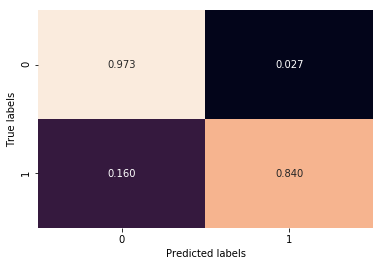

Sensitivity  0.8396288933068258
Precision  0.8653632715785878
F1 score  0.8523018709270549
---------------------------
100 trees, max_depth=None
Score on testing:  0.9527052591751797
******Confusion matrix******


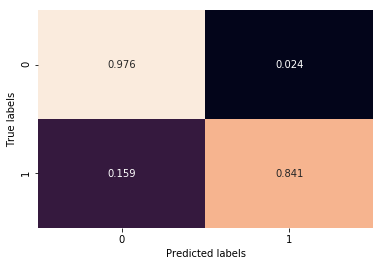

Sensitivity  0.8407057654075547
Precision  0.8748383760020688
F1 score  0.8574325180585477


<Figure size 432x288 with 0 Axes>

In [5]:
RF = classyRF.ClassificationRF()
RF.load_train_dataset(pathHere, fname_x='train_2cat.csv')
RF.load_test_dataset(pathHere, fname_x='test_2cat.csv')
RF.Nfeatures = 5
RF.data_train=RF.data_train_all[:,2:7]
RF.data_test=RF.data_test_all[:,2:7]
print("50 trees, max_depth=15")
RF.train(trees=50, criterion='gini', max_features='sqrt', max_depth=15)
RF.print_metrics(pathHere)
otherscores(RF)
print("---------------------------")
print("50 trees, max_depth=None")
RF.train(trees=50, criterion='gini', max_features='sqrt', max_depth=None)
RF.print_metrics(pathHere)
otherscores(RF)
print("---------------------------")
print("100 trees, max_depth=15")
RF.train(trees=100, criterion='gini', max_features='sqrt', max_depth=15)
RF.print_metrics(pathHere)
otherscores(RF)
print("---------------------------")
print("100 trees, max_depth=None")
RF.train(trees=100, criterion='gini', max_features='sqrt', max_depth=None)
RF.print_metrics(pathHere)
otherscores(RF)

Best: Results for MassGap are not good enough with any setting. 50 trees and 15 max_depth looks the best

# 3 categories

50 trees, max_depth=15
Score on testing:  0.950897549081431
******Confusion matrix******


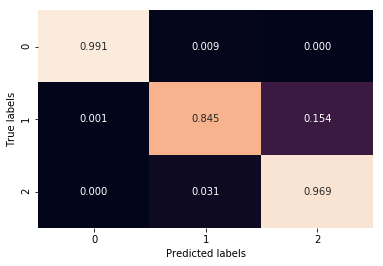

Sensitivity  0.8450132538104705
Precision  0.8620077742099037
F1 score  0.8534259181795365
---------------------------
50 trees, max_depth=None
Score on testing:  0.9516682781911688
******Confusion matrix******


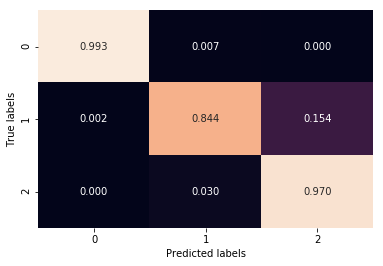

Sensitivity  0.8440192180251822
Precision  0.8667800935772011
F1 score  0.8552482477861251
---------------------------
100 trees, max_depth=15
Score on testing:  0.9519485433219826
******Confusion matrix******


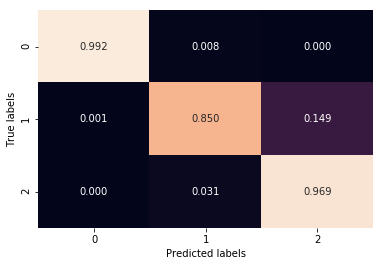

Sensitivity  0.8499005964214712
Precision  0.8638545087143218
F1 score  0.8568207440811725
---------------------------
100 trees, max_depth=None
Score on testing:  0.952018609604686
******Confusion matrix******


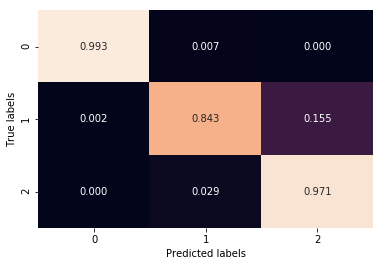

Sensitivity  0.8431908548707754
Precision  0.8692570452604612
F1 score  0.8560255655537801


<Figure size 432x288 with 0 Axes>

In [6]:
RF = classyRF.ClassificationRF()
RF.load_train_dataset(pathHere, fname_x='train_3cat.csv')
RF.load_test_dataset(pathHere, fname_x='test_3cat.csv')
RF.Nfeatures = 5
RF.data_train=RF.data_train_all[:,2:7]
RF.data_test=RF.data_test_all[:,2:7]
print("50 trees, max_depth=15")
RF.train(trees=50, criterion='gini', max_features='sqrt', max_depth=15)
RF.print_metrics(pathHere)
otherscores(RF)
print("---------------------------")
print("50 trees, max_depth=None")
RF.train(trees=50, criterion='gini', max_features='sqrt', max_depth=None)
RF.print_metrics(pathHere)
otherscores(RF)
print("---------------------------")
print("100 trees, max_depth=15")
RF.train(trees=100, criterion='gini', max_features='sqrt', max_depth=15)
RF.print_metrics(pathHere)
otherscores(RF)
print("---------------------------")
print("100 trees, max_depth=None")
RF.train(trees=100, criterion='gini', max_features='sqrt', max_depth=None)
RF.print_metrics(pathHere)
otherscores(RF)

Best: Here 100 trees with limited depth seems better. Still not very good results

# 4 categories

50 trees, max_depth=15
Score on testing:  0.9427698602878323
******Confusion matrix******


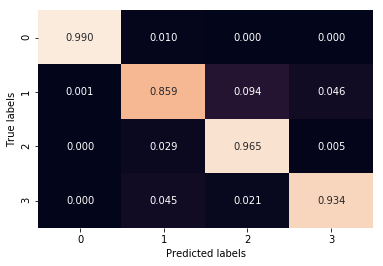

Sensitivity  0.8585984095427435
Precision  0.8498688094457199
F1 score  0.85421130707104
---------------------------
50 trees, max_depth=None
Score on testing:  0.9419570914084724
******Confusion matrix******


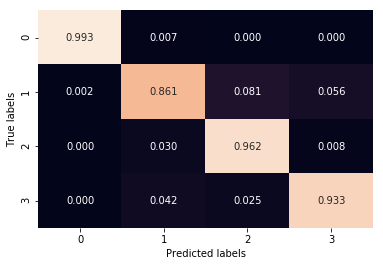

Sensitivity  0.8612491716368457
Precision  0.8548055578393489
F1 score  0.8580152671755726
---------------------------
100 trees, max_depth=15
Score on testing:  0.9429099928532392
******Confusion matrix******


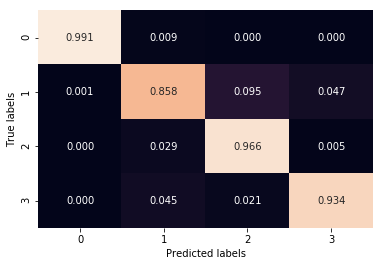

Sensitivity  0.8577700463883366
Precision  0.8509326978387707
F1 score  0.854337692339425
---------------------------
100 trees, max_depth=None
Score on testing:  0.9421953167696641
******Confusion matrix******


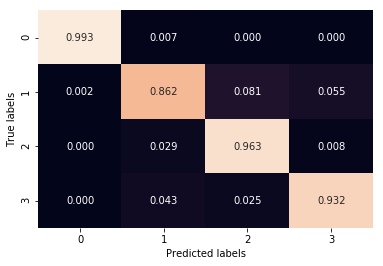

Sensitivity  0.8622432074221339
Precision  0.8557218020388031
F1 score  0.8589701270836773


<Figure size 432x288 with 0 Axes>

In [7]:
RF = classyRF.ClassificationRF()
RF.load_train_dataset(pathHere, fname_x='train_4cat.csv')
RF.load_test_dataset(pathHere, fname_x='test_4cat.csv')
RF.Nfeatures = 5
RF.data_train=RF.data_train_all[:,2:7]
RF.data_test=RF.data_test_all[:,2:7]
print("50 trees, max_depth=15")
RF.train(trees=50, criterion='gini', max_features='sqrt', max_depth=15)
RF.print_metrics(pathHere)
otherscores(RF)
print("---------------------------")
print("50 trees, max_depth=None")
RF.train(trees=50, criterion='gini', max_features='sqrt', max_depth=None)
RF.print_metrics(pathHere)
otherscores(RF)
print("---------------------------")
print("100 trees, max_depth=15")
RF.train(trees=100, criterion='gini', max_features='sqrt', max_depth=15)
RF.print_metrics(pathHere)
otherscores(RF)
print("---------------------------")
print("100 trees, max_depth=None")
RF.train(trees=100, criterion='gini', max_features='sqrt', max_depth=None)
RF.print_metrics(pathHere)
otherscores(RF)

Best: best results so far, the percentage of massgap events classified correctly is bigger. Better results are with no limited depth

## Plot de data (mass gap recovered values)

In [8]:
data = readfile(filename=pathHere + 'train_2cat.csv')
indexes=np.where(data[:,-1]==1)[0]

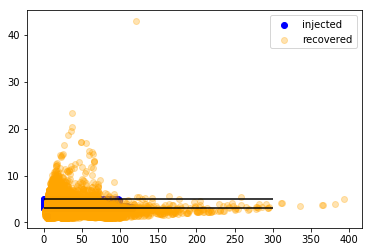

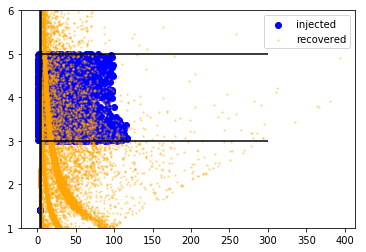

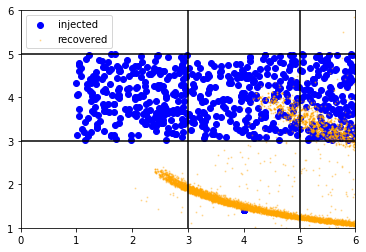

In [9]:
plt.hlines(3,0,300)
plt.hlines(5,0,300)
plt.scatter(data[indexes,0],data[indexes,1], label='injected',c='blue')
plt.scatter(data[indexes,2],data[indexes,3], label='recovered',c='orange',alpha=0.3)
plt.legend()
plt.show()

plt.ylim(1,6)
plt.hlines(3,0,300)
plt.hlines(5,0,300)
plt.vlines(3,0,6)
plt.vlines(5,0,6)
plt.scatter(data[indexes,0],data[indexes,1], label='injected',c='blue')
plt.scatter(data[indexes,2],data[indexes,3], label='recovered',c='orange',s=2, alpha=0.3)
plt.legend()
plt.show()

plt.ylim(1,6)
plt.xlim(0,6)
plt.hlines(3,0,300)
plt.hlines(5,0,300)
plt.vlines(3,0,6)
plt.vlines(5,0,6)
plt.scatter(data[indexes,0],data[indexes,1], label='injected',c='blue')
plt.scatter(data[indexes,2],data[indexes,3], label='recovered',c='orange',s=1, alpha=0.3)
plt.legend()

# Comparison of better trees for 2, 3 and 4 categories

CRITERION: GINI
2 categories: 50 trees, max_depth=15
2 cat
Score on testing:  0.9508414960552682
******Confusion matrix******


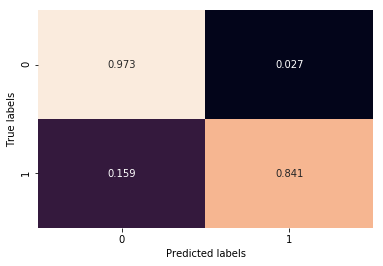

Sensitivity  0.8407057654075547
Precision  0.8649224475882051
F1 score  0.8526421910442746
3 categories: 100 trees, max_depth=15
3 cat
Score on testing:  0.9519485433219826
******Confusion matrix******


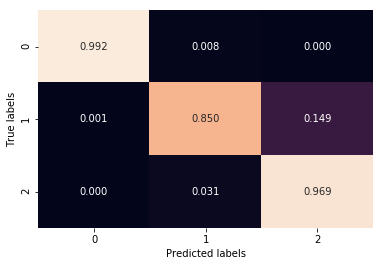

Sensitivity  0.8499005964214712
Precision  0.8638545087143218
F1 score  0.8568207440811725
4 categories: 50 trees, max_depth=None
4 cat
Score on testing:  0.9419570914084724
******Confusion matrix******


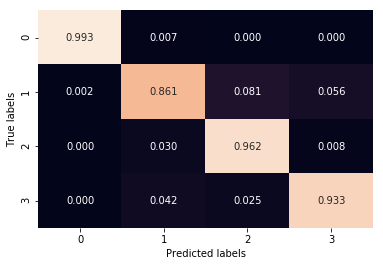

Sensitivity  0.8612491716368457
Precision  0.8548055578393489
F1 score  0.8580152671755726
CRITERION: ENTROPY
2 categories: 50 trees, max_depth=15
2 cat
Score on testing:  0.9483751629041073
******Confusion matrix******


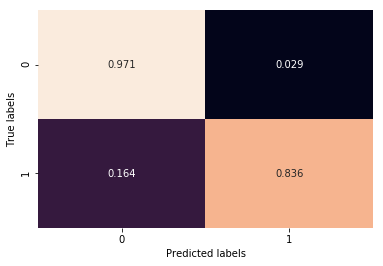

Sensitivity  0.8362326043737575
Precision  0.8553634977122521
F1 score  0.8456898718270922
3 categories: 100 trees, max_depth=15
3 cat
Score on testing:  0.951976569835064
******Confusion matrix******


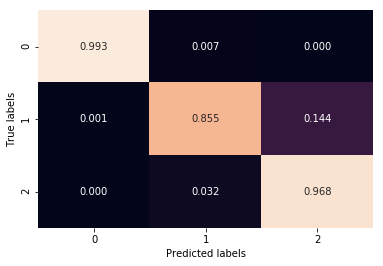

Sensitivity  0.8547879390324719
Precision  0.8604185775035438
F1 score  0.8575940162061085
4 categories: 50 trees, max_depth=None
4 cat
Score on testing:  0.9416908395341993
******Confusion matrix******


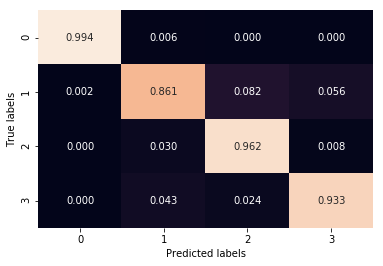

Sensitivity  0.8608349900596421
Precision  0.8534822601839686
F1 score  0.8571428571428573


<Figure size 432x288 with 0 Axes>

In [10]:
print('CRITERION: GINI')
print("2 categories: 50 trees, max_depth=15")
RF2 = classyRF.ClassificationRF()
RF2.load_train_dataset(pathHere, fname_x='train_2cat.csv')
RF2.load_test_dataset(pathHere, fname_x='test_2cat.csv')
RF2.Nfeatures = 5
RF2.data_train=RF2.data_train_all[:,2:7]
RF2.data_test=RF2.data_test_all[:,2:7]
print("2 cat")
RF2.train(trees=50, criterion='gini', max_features='sqrt', max_depth=15)
RF2.print_metrics(pathHere)
otherscores(RF2)

print("3 categories: 100 trees, max_depth=15")
RF3 = classyRF.ClassificationRF()
RF3.load_train_dataset(pathHere, fname_x='train_3cat.csv')
RF3.load_test_dataset(pathHere, fname_x='test_3cat.csv')
RF3.Nfeatures = 5
RF3.data_train=RF3.data_train_all[:,2:7]
RF3.data_test=RF3.data_test_all[:,2:7]
print("3 cat")
RF3.train(trees=100, criterion='gini', max_features='sqrt', max_depth=15)
RF3.print_metrics(pathHere)
otherscores(RF3)

print("4 categories: 50 trees, max_depth=None")
RF4 = classyRF.ClassificationRF()
RF4.load_train_dataset(pathHere, fname_x='train_4cat.csv')
RF4.load_test_dataset(pathHere, fname_x='test_4cat.csv')
RF4.Nfeatures = 5
RF4.data_train=RF4.data_train_all[:,2:7]
RF4.data_test=RF4.data_test_all[:,2:7]
print("4 cat")
RF4.train(trees=50, criterion='gini', max_features='sqrt', max_depth=None)
RF4.print_metrics(pathHere)
otherscores(RF4)

print('CRITERION: ENTROPY')
print("2 categories: 50 trees, max_depth=15")
RF2 = classyRF.ClassificationRF()
RF2.load_train_dataset(pathHere, fname_x='train_2cat.csv')
RF2.load_test_dataset(pathHere, fname_x='test_2cat.csv')
RF2.Nfeatures = 5
RF2.data_train=RF2.data_train_all[:,2:7]
RF2.data_test=RF2.data_test_all[:,2:7]
print("2 cat")
RF2.train(trees=50, criterion='entropy', max_features='sqrt', max_depth=15)
RF2.print_metrics(pathHere)
otherscores(RF2)

print("3 categories: 100 trees, max_depth=15")
RF3 = classyRF.ClassificationRF()
RF3.load_train_dataset(pathHere, fname_x='train_3cat.csv')
RF3.load_test_dataset(pathHere, fname_x='test_3cat.csv')
RF3.Nfeatures = 5
RF3.data_train=RF3.data_train_all[:,2:7]
RF3.data_test=RF3.data_test_all[:,2:7]
print("3 cat")
RF3.train(trees=100, criterion='entropy', max_features='sqrt', max_depth=15)
RF3.print_metrics(pathHere)
otherscores(RF3)

print("4 categories: 50 trees, max_depth=None")
RF4 = classyRF.ClassificationRF()
RF4.load_train_dataset(pathHere, fname_x='train_4cat.csv')
RF4.load_test_dataset(pathHere, fname_x='test_4cat.csv')
RF4.Nfeatures = 5
RF4.data_train=RF4.data_train_all[:,2:7]
RF4.data_test=RF4.data_test_all[:,2:7]
print("4 cat")
RF4.train(trees=50, criterion='entropy', max_features='sqrt', max_depth=None)
RF4.print_metrics(pathHere)
otherscores(RF4)

We see a bit more accuracy on being in mass gap using 4 categories. Gini and entropy criterion are very similar. Entropy is a bit better for 3 and 4 categories

In [12]:
RF2 = classyRF.ClassificationRF()
RF2.load_train_dataset(pathHere, fname_x='train_2cat.csv')
RF2.load_test_dataset(pathHere, fname_x='test_2cat.csv')
RF2.Nfeatures = 5
RF2.data_train=RF2.data_train_all[:,2:7]
RF2.data_test=RF2.data_test_all[:,2:7]
RF2.train(trees=50, criterion='gini', max_features='sqrt', max_depth=15)
RF2.saveModel(path=pathHere,filename='RF2_gini_50t_15d')

RF3 = classyRF.ClassificationRF()
RF3.load_train_dataset(pathHere, fname_x='train_3cat.csv')
RF3.load_test_dataset(pathHere, fname_x='test_3cat.csv')
RF3.Nfeatures = 5
RF3.data_train=RF3.data_train_all[:,2:7]
RF3.data_test=RF3.data_test_all[:,2:7]
RF3.train(trees=100, criterion='entropy', max_features='sqrt', max_depth=15)
RF3.saveModel(path=pathHere,filename='RF3_entropy_100t_15d')

RF4 = classyRF.ClassificationRF()
RF4.load_train_dataset(pathHere, fname_x='train_4cat.csv')
RF4.load_test_dataset(pathHere, fname_x='test_4cat.csv')
RF4.Nfeatures = 5
RF4.data_train=RF4.data_train_all[:,2:7]
RF4.data_test=RF4.data_test_all[:,2:7]
RF4.train(trees=50, criterion='entropy', max_features='sqrt', max_depth=None)
RF4.saveModel(path=pathHere,filename='RF4_entropy_50t_Noned')

RF2 is 19MB;    RF3 is 33MB;    RF4 is 72MB

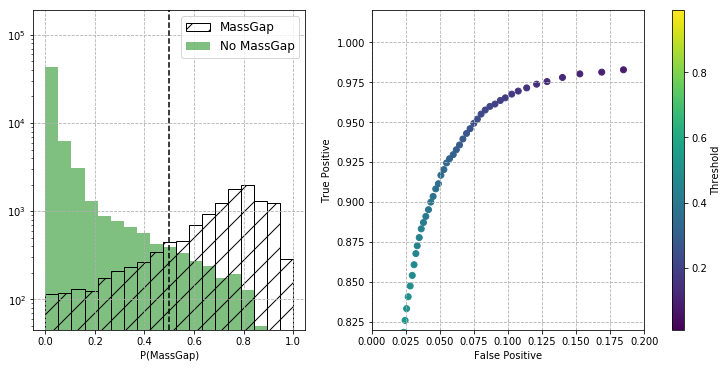

In [13]:
hist_ROC_MassGap(RF2,'')

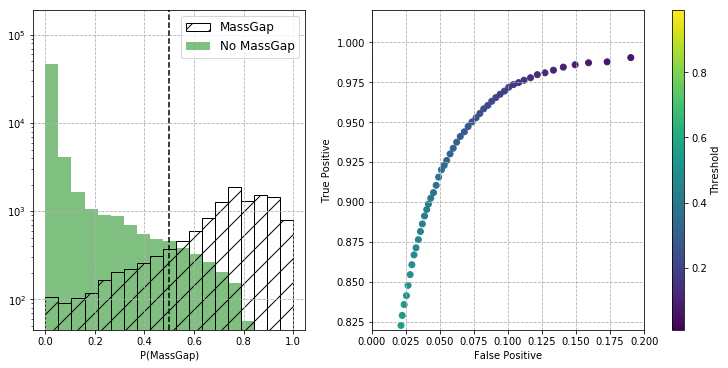

In [14]:
hist_ROC_MassGap(RF3,'')

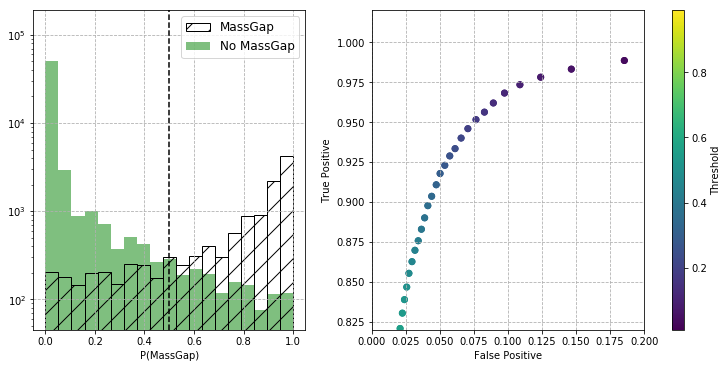

In [15]:
hist_ROC_MassGap(RF4,'')

2 and 3 categories perform similarly. 4 categories seem to perform better